# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [2]:
import pandas as pd

In [132]:
df_Iris = pd.read_csv("G:\Residency 2\Lab ML\Internal\iris.csv")

In [13]:
from random import sample 
df_Iris.sample(n = 10) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
3,4,4.6,3.1,1.5,0.2,Iris-setosa
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
38,39,4.4,3.0,1.3,0.2,Iris-setosa
141,142,6.9,3.1,5.1,2.3,Iris-virginica
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
104,105,6.5,3.0,5.8,2.2,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
137,138,6.4,3.1,5.5,1.8,Iris-virginica
57,58,4.9,2.4,3.3,1.0,Iris-versicolor


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [17]:
df_Iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [140]:
df_Iris.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.20,2.0,Iris-virginica
148,149,6.2,3.4,5.40,2.3,Iris-virginica
149,150,5.9,3.0,5.10,1.8,Iris-virginica
150,151,5.9,3.0,4.35,1.3,Iris-virginica
151,152,5.8,3.0,4.35,1.8,Iris-virginica


In [139]:
df_Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [133]:
#dataframe['c'] = pandas.Categorical.from_array(dataframe.col3).codes
df_Iris['Species'] = pd.Categorical(df_Iris['Species'])

In [138]:
import numpy as np
df_Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Fill missing values with median of that particular column

In [137]:
#SepalLengthCm    1
#SepalWidthCm     2
#PetalLengthCm    2
#PetalWidthCm     1

df_Iris.replace(to_replace= np.nan,value=df_Iris.median(),inplace=True)

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [150]:
df_Iris['Species'].unique() 

[Iris-setosa, Iris-versicolor, Iris-virginica]
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]

In [152]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df_Iris['Species']= label_encoder.fit_transform(df_Iris['Species']) 
  
df_Iris['Species'].unique() 

array([0, 1, 2], dtype=int64)

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [172]:
del(df_Iris['Id'])


In [174]:
df_Iris.corr()
#each independent variable with target variable
#drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


In [178]:
del(df_Iris['SepalWidthCm'])

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [179]:
df_Iris.var()

SepalLengthCm    0.676645
PetalLengthCm    3.076516
PetalWidthCm     0.577141
Species          0.675322
dtype: float64

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

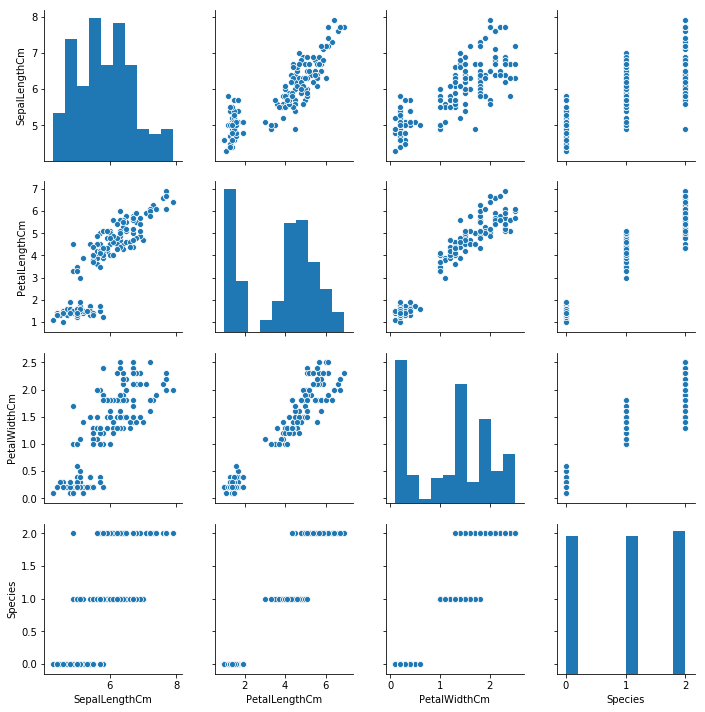

In [183]:
#pandas.plotting.scatter_matrix()
import seaborn as sns
sns.pairplot(df_Iris)

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [186]:
X=df_Iris.drop('Species',axis=1)
y=df_Iris['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [188]:
X_train.shape

(121, 3)

In [190]:
y_train.shape

(121,)

In [192]:
X_test.shape

(31, 3)

In [193]:
y_test.shape

(31,)

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [196]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in [3,5,9]:
    classifier = KNeighborsClassifier(n_neighbors= i)  
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test)    
    print('For n =',i,"Accuracy = ",accuracy_score(y_pred,y_test))

For n = 3 Accuracy =  1.0
For n = 5 Accuracy =  1.0
For n = 9 Accuracy =  1.0


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [199]:
list = []
dict1= {}
for i in range(1,20,2):
    classifier = KNeighborsClassifier(n_neighbors= i)  
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test)    
    print("For K=",i,"Accuracy is: ", accuracy_score(y_test, y_pred))
    list.append(accuracy_score(y_test, y_pred))
    dict1[i] = accuracy_score(y_test, y_pred)
    #error.append(np.mean(pred_i != y_test_np))

For K= 1 Accuracy is:  0.967741935483871
For K= 3 Accuracy is:  1.0
For K= 5 Accuracy is:  1.0
For K= 7 Accuracy is:  1.0
For K= 9 Accuracy is:  1.0
For K= 11 Accuracy is:  1.0
For K= 13 Accuracy is:  1.0
For K= 15 Accuracy is:  1.0
For K= 17 Accuracy is:  1.0
For K= 19 Accuracy is:  1.0


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

Text(0, 0.5, 'Accuracy')

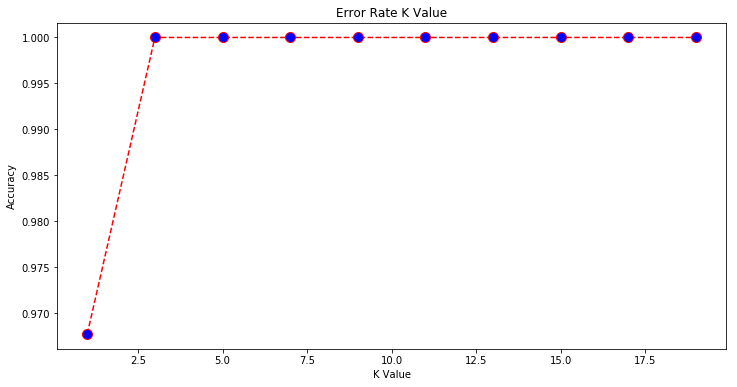

In [200]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  
plt.plot(range(1,20,2),list, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [4]:
import pandas as pd
df_Cancer = pd.read_csv("bc2.csv")

In [5]:
#df_Cancer.head(8)
df_Cancer.tail(8)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
691,695091,5,10,10,5,4,5,4,4,1,4
692,714039,3,1,1,1,2,1,1,1,1,2
693,763235,3,1,1,1,2,1,2,1,2,2
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [201]:
df_Cancer.shape
#669 records
#11 columns

NameError: name 'df_Cancer' is not defined

In [8]:
list(df_Cancer.columns) 

['ID',
 'ClumpThickness',
 'Cell Size',
 'Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Normal Nucleoli',
 'Bland Chromatin',
 'Mitoses',
 'Class']

In [9]:
df_Cancer.info()
#Bare Nuclei object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [282]:
import numpy as np
df_Cancer.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [25]:
ax = sns.boxplot(x=df_Cancer)

#ax = sns.boxplot(x=df_Cancer["ClumpThickness"])
#ax = sns.boxplot(x=df_Cancer["Cell Size"])
#ax = sns.boxplot(x=df_Cancer["Mitoses"]) # high outliers
#ax = sns.boxplot(x=df_Cancer["Marginal Adhesion"]) #2 outliers
#ax = sns.boxplot(x=df_Cancer["Single Epithelial Cell Size"]) # 3 outliers
#ax = sns.boxplot(x=df_Cancer["Bare Nuclei"])
#ax = sns.boxplot(x=df_Cancer["Normal Nucleoli"]) # 1 out;lier
#ax = sns.boxplot(x=df_Cancer["Bland Chromatin"]) # it has 2 outliers

NameError: name 'sns' is not defined

In [26]:
'''def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return iqr,df_out

remove_outlier(df_Cancer,'Mitoses')'''

"def remove_outlier(df_in, col_name):\n    q1 = df_in[col_name].quantile(0.25)\n    q3 = df_in[col_name].quantile(0.75)\n    iqr = q3-q1 #Interquartile range\n    fence_low  = q1-1.5*iqr\n    fence_high = q3+1.5*iqr\n    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]\n    return iqr,df_out\n\nremove_outlier(df_Cancer,'Mitoses')"

#### Check Missing Values

In [27]:
#First check for the null value.If not.Check the data set manually for any invalid data.
df_Cancer[df_Cancer.isnull()].count()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [28]:
df_Cancer['Bare Nuclei'][df_Cancer['Bare Nuclei'] == '?'].count()

0

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [29]:
var = df_Cancer['Bare Nuclei'].describe(include='all')['top']
type(var)

str

In [30]:
int(var)

1

In [31]:
df_Cancer['Bare Nuclei'].replace('?',var,inplace = True)


#check the count now
df_Cancer['Bare Nuclei'][df_Cancer['Bare Nuclei'] == '?'].count()

0

### Question 5
#### Find the distribution of target variable (Class) 

In [32]:
 y = df_Cancer['Class']

In [33]:
y.value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

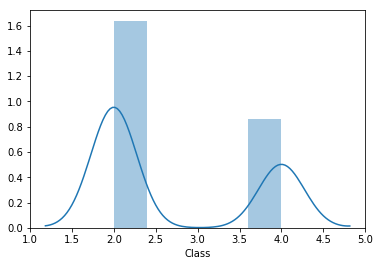

In [36]:
import seaborn as sns
sns.distplot(df_Cancer['Class'])

#### Convert the datatype of Bare Nuclei to `int`

In [37]:
df_Cancer['Bare Nuclei']=df_Cancer['Bare Nuclei'].astype(int)
df_Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

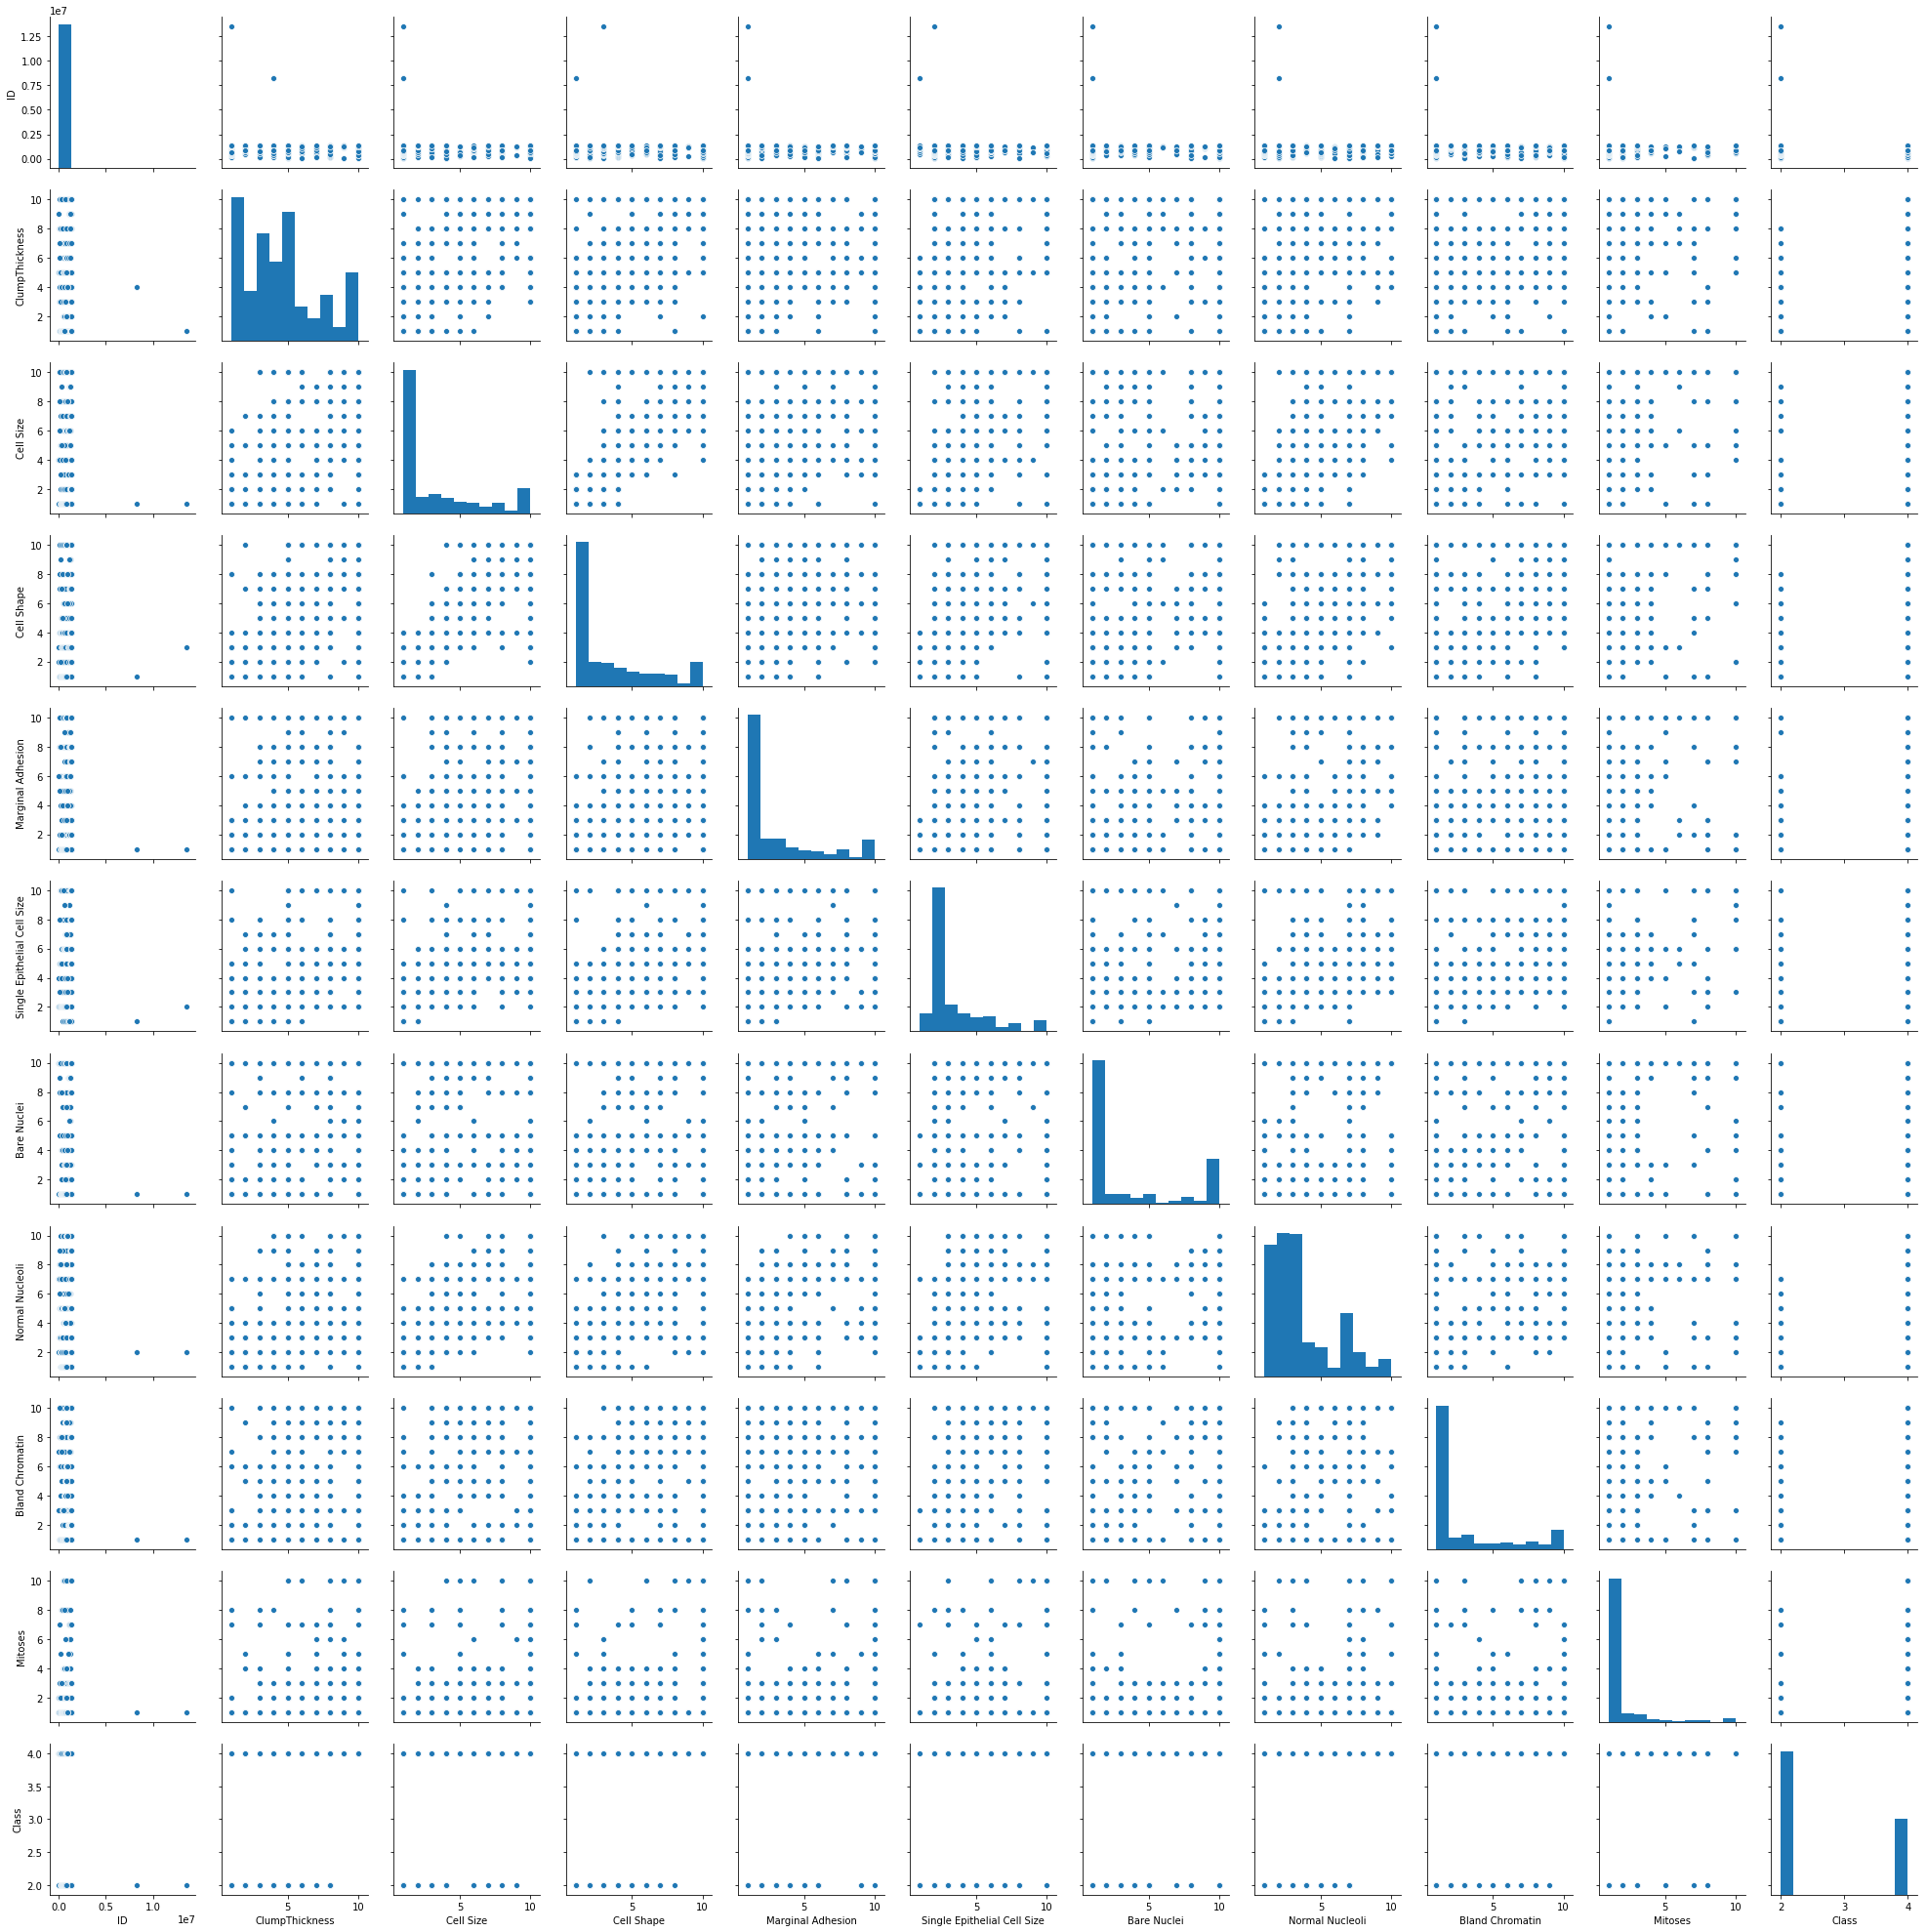

In [38]:
#sns.set(style="ticks")
#sns.pairplot(df_Cancer, hue="species")
sns.pairplot(df_Cancer)

In [39]:
df_Cancer.corr()
#Cell Shape and Cell Size .906882

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [40]:
df_Cancer_new = df_Cancer.drop('ID',axis = 1)
df_Cancer_new = df_Cancer.drop('Cell Size',axis = 1)
df_Cancer_new.corr()

,ID,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Shape,-0.041576,0.654589,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [41]:
X=df_Cancer_new.drop('Class',axis=1)
y=df_Cancer_new['Class']

#### Divide the Training and Test sets in 70:30 

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [43]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

C:\Users\Paridhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\Paridhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  


## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in [3,5,9]:
    classifier = KNeighborsClassifier(n_neighbors= i)  
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test)    
    print('For n =',i,"Accuracy = ",accuracy_score(y_pred,y_test))

For n = 3 Accuracy =  0.9619047619047619
For n = 5 Accuracy =  0.9619047619047619
For n = 9 Accuracy =  0.9571428571428572


In [368]:
#y_test_np=np.asarray(y_test)

## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [48]:
list = []
dict1= {}
for i in range(1,20,2):
    classifier = KNeighborsClassifier(n_neighbors= i)  
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test)    
    print("For K=",i,"Accuracy is: ", accuracy_score(y_test, y_pred))
    list.append(accuracy_score(y_test, y_pred))
    dict1[i] = accuracy_score(y_test, y_pred)
    #error.append(np.mean(pred_i != y_test_np))

For K= 1 Accuracy is:  0.9619047619047619
For K= 3 Accuracy is:  0.9619047619047619
For K= 5 Accuracy is:  0.9619047619047619
For K= 7 Accuracy is:  0.9619047619047619
For K= 9 Accuracy is:  0.9571428571428572
For K= 11 Accuracy is:  0.9571428571428572
For K= 13 Accuracy is:  0.9571428571428572
For K= 15 Accuracy is:  0.9571428571428572
For K= 17 Accuracy is:  0.9476190476190476
For K= 19 Accuracy is:  0.9523809523809523


In [49]:
max(dict1, key=dict1.get) 

1

In [53]:
#As we see K =1,3,5,7 giving exact same accuracy. We need to improvise our data. 
#But as of now lets try removing 1,3 and 5 .Later in plot we can see the optimal K value.

del dict1[1]
del dict1[3]
del dict1[5]
max(dict1, key=dict1.get) 

7

## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

Text(0, 0.5, 'Accuracy')

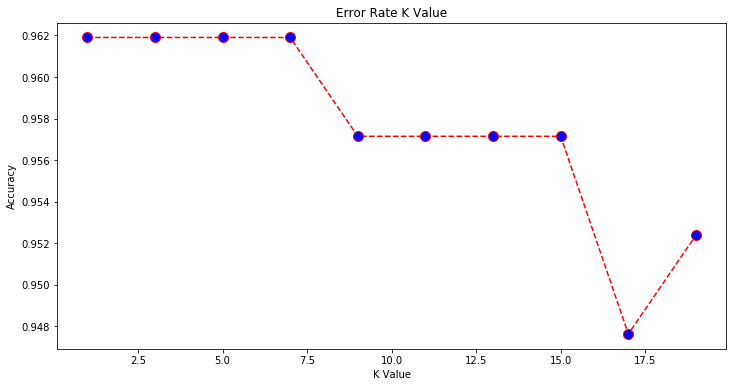

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  
plt.plot(range(1,20,2),list, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 